In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

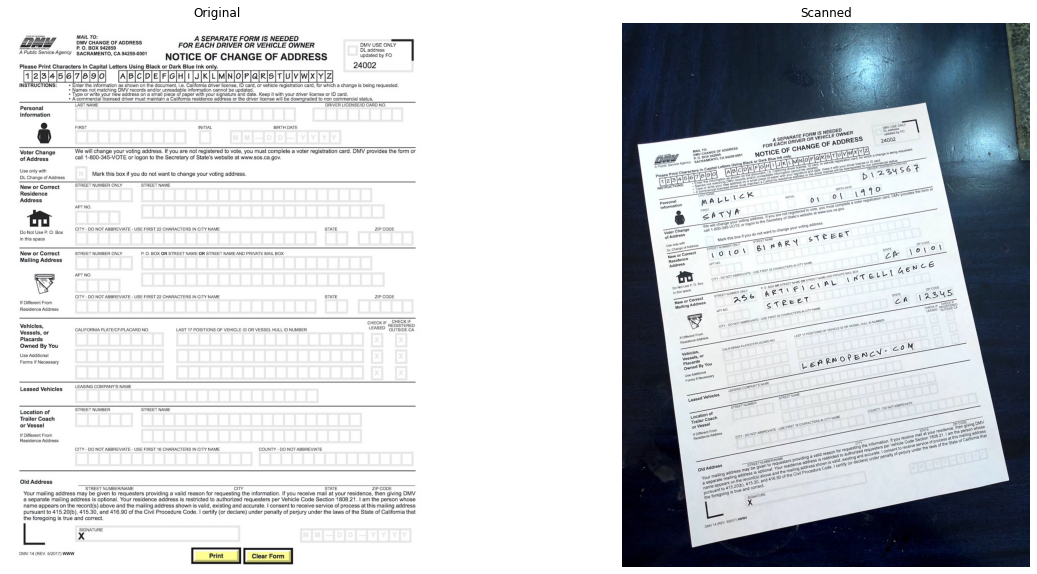

In [13]:
img_1 = cv2.imread('form.jpg', cv2.IMREAD_COLOR)
img_2 = cv2.imread('scanned-form.jpg', cv2.IMREAD_COLOR)

plt.figure(figsize=[20, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(img_1); plt.title('Original')
plt.subplot(122); plt.axis('off'); plt.imshow(img_2); plt.title('Scanned')

# ok, now find the keypoints
img1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(img1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2_gray, None)


# Ok, display the kyepoints

In [14]:
flags = cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
im1_display = cv2.drawKeypoints(img_1, keypoints1, outImage=np.array([]), color=(255, 0, 0), flags=flags)
im2_display = cv2.drawKeypoints(img_2, keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=flags)

plt.figure(figsize=[20, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title('Original')
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title('Scanned')

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\draw.cpp:115: error: (-215:Assertion failed) !outImage.empty() in function 'cv::drawKeypoints'
